In [ ]:
!pip install yfinance

[*********************100%***********************]  5 of 5 completed


Portfolio Analysis:
         Annualized Return  Annualized Volatility
Ticker                                          
AAPL             0.287461               0.334850
AMZN             0.133328               0.358028
GOOGL            0.148950               0.313965
MSFT             0.265836               0.310333
TSLA             0.565226               0.655410


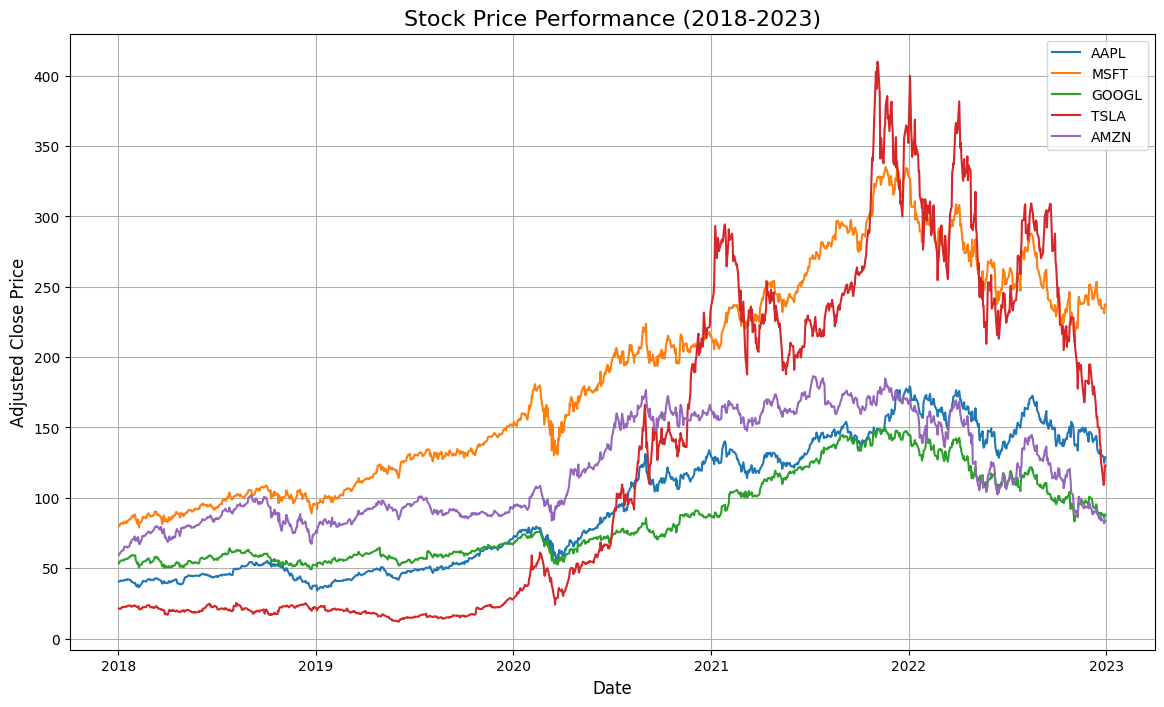

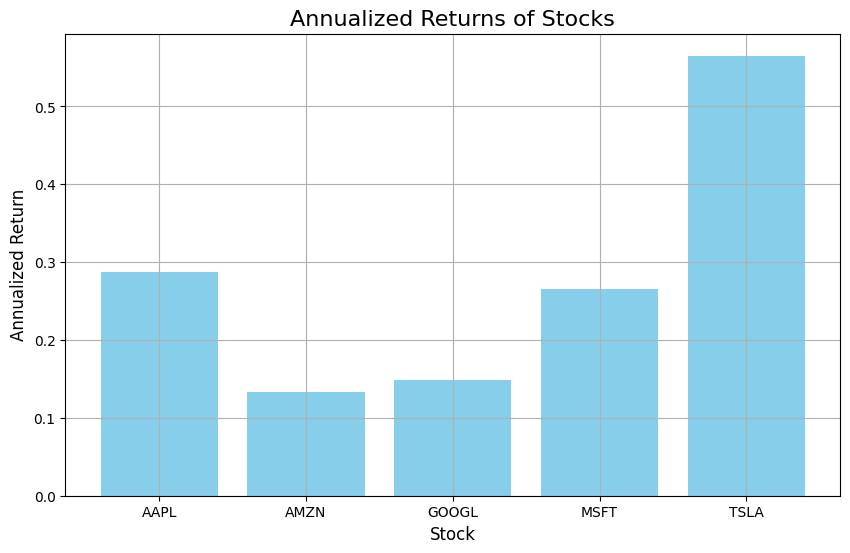

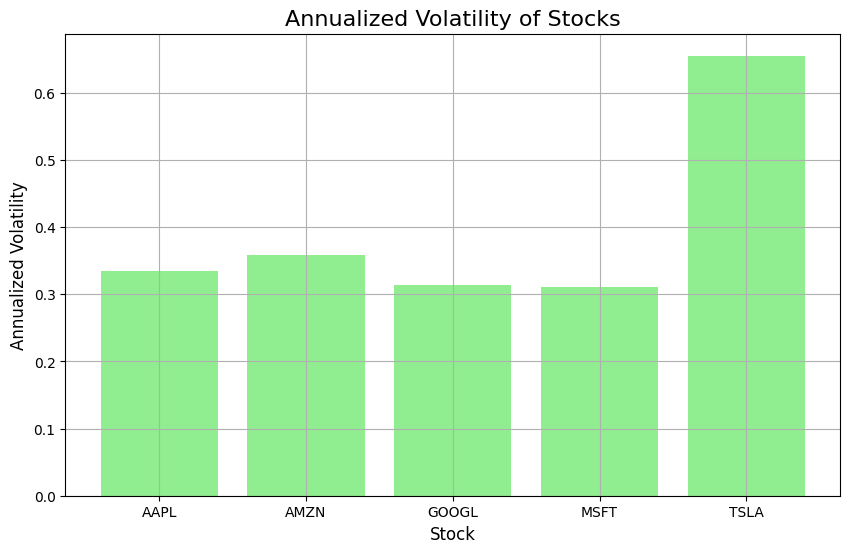

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download the historical stock data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate annualized returns and volatility
annual_returns = returns.mean() * 252  # 252 trading days in a year
annual_volatility = returns.std() * np.sqrt(252)

# Display the calculated annual returns and volatility
portfolio_analysis = pd.DataFrame({
    'Annualized Return': annual_returns,
    'Annualized Volatility': annual_volatility
})

print("Portfolio Analysis:\n", portfolio_analysis)

# Plot stock price performance over time
plt.figure(figsize=(14, 8))
for stock in tickers:
    plt.plot(data.index, data[stock], label=stock)

plt.title('Stock Price Performance (2018-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot annualized return and volatility
plt.figure(figsize=(10, 6))
plt.bar(portfolio_analysis.index, portfolio_analysis['Annualized Return'], color='skyblue', label='Annualized Return')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Annualized Returns of Stocks', fontsize=16)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(portfolio_analysis.index, portfolio_analysis['Annualized Volatility'], color='lightgreen', label='Annualized Volatility')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.title('Annualized Volatility of Stocks', fontsize=16)
plt.grid(True)
plt.show()


In [ ]:
pip install yfinance matplotlib PyPortfolioOpt numpy pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
from pypfopt import EfficientFrontier, risk_models, expected_returns
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("Optimal Weights:", cleaned_weights)


NameError: name 'data' is not defined

[*********************100%***********************]  5 of 5 completed


Expected annual return: 28.3%
Annual volatility: 32.6%
Sharpe Ratio: 0.81
Expected annual return: 17.5%
Annual volatility: 29.1%
Sharpe Ratio: 0.53


InstantiationError: Adding constraints to an already solved problem might have unintended consequences. A new instance should be created for the new set of constraints.

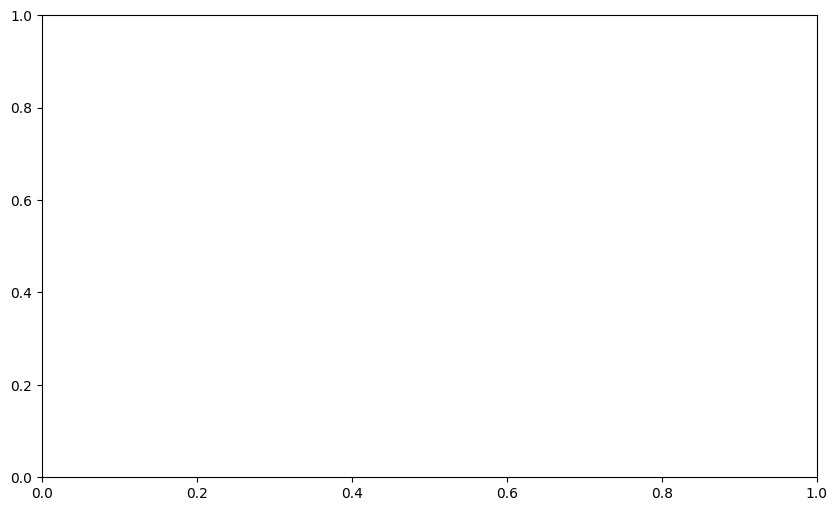

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

# Define the stock tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download the historical stock data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# First, calculate the Maximum Sharpe Ratio portfolio
ef_sharpe = EfficientFrontier(mu, S)
max_sharpe_portfolio = ef_sharpe.max_sharpe()  # Maximize the Sharpe ratio
max_sharpe_weights = ef_sharpe.clean_weights()
max_sharpe_return, max_sharpe_volatility, _ = ef_sharpe.portfolio_performance(verbose=True)

# Now, create a new EfficientFrontier object for Minimum Volatility
ef_volatility = EfficientFrontier(mu, S)
min_volatility_portfolio = ef_volatility.min_volatility()  # Minimize volatility
min_volatility_weights = ef_volatility.clean_weights()
min_vol_return, min_vol_volatility, _ = ef_volatility.portfolio_performance(verbose=True)

# Plotting the Efficient Frontier
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the efficient frontier
plotting.plot_efficient_frontier(ef_volatility, ax=ax, show_assets=True)

# Plot the Maximum Sharpe ratio point
ax.scatter(max_sharpe_volatility, max_sharpe_return, marker="*", s=200, c="r", label="Maximum Sharpe ratio")

# Plot the Minimum Volatility point
ax.scatter(min_vol_volatility, min_vol_return, marker="o", s=200, c="g", label="Minimum Volatility")

# Customizing the plot
plt.title('Efficient Frontier with Optimal Portfolios')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Returns')
plt.legend()
plt.grid()
plt.show()
